# Predicting Daily Temperature Using Environmental and Air Quality Indicators: A Machine Learning Approach
## Multi Linear Regression Model
In machine learning Multi Linear Regression is a technique used to study the relationship between one dependant variable and two or more independant variables. This statistical technique is used to predict the dependant variable based on the relationship with other independant variables.


### Formula for Multiple Linear Regression
$$
Y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n + \epsilon
$$


- \$( Y \)$ is the dependent variable.

- \$( \beta_0 \)$ is the intercept (the value of \$( y \)\$ when all \$( x_i \)\$'s are zero).

- \$( \beta_1, \beta_2, \dots, \beta_n \)$ are the coefficients (or weights) for each independent variable \$( x_1, x_2, \dots, x_n \)\$, which indicate the impact of each \$( x_i \)\$ on \$( y \)\$.

- \$( x_1, x_2, \dots, x_n \)$ are the independent variables (predictors or features).

- \$( \epsilon \)$ is the error term, representing the residuals or noise (the part of \$( y \)\$ that cannot be explained by the linear combination of the \$( x_i \)\$'s).


## Dataset

The dataset used in this project is taken from Kaggle: [Weather Data Insights](https://www.kaggle.com/code/nithinreddy90/weather-data-insights).

The dataset contains daily weather data from May 2024 to Nov 2024. It includes the following features (raw labels):

- **country**
- **location_name**
- **latitude**
- **longitude**
- **timezone**
- **last_updated_epoch**
- **last_updated**
- **temperature_celsius**
- **temperature_fahrenheit**
- **condition_text**
- **wind_mph**
- **wind_kph**
- **wind_degree**
- **wind_direction**
- **pressure_mb**
- **pressure_in**
- **precip_mm**
- **precip_in**
- **humidity**
- **cloud**
- **feels_like_celsius**
- **feels_like_fahrenheit**
- **visibility_km**
- **visibility_miles**
- **uv_index**
- **gust_mph**
- **gust_kph**
- **air_quality_Carbon_Monoxide**
- **air_quality_Ozone**
- **air_quality_Nitrogen_dioxide**
- **air_quality_Sulphur_dioxide**
- **air_quality_PM2.5**
- **air_quality_PM10**
- **air_quality_us-epa-index**
- **air_quality_gb-defra-index**
- **sunrise**
- **sunset**
- **moonrise**
- **moonset**
- **moon_phase**
- **moon_illumination**


## Data Loading and Preprocessing

In [ ]:
# Data analysis, visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Read data into pandas data frame
df_weather = pd.read_csv(r"C:\Users\Dell\Desktop\global-weather-repository\versions\407\GlobalWeatherRepository.csv")

# Show top 5 entries in the data frame
df_weather.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [ ]:
# The data frame contains daily weather data of all countries' capitals
# Let's pick Pakistan (capital: Islamabad) for our study
df_pak = df_weather.loc[df_weather['country'] == 'Pakistan']

# Show top 5 entries in the filtered data frame (df_pak)
df_pak.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
131,Pakistan,Islamabad,33.7,73.17,Asia/Karachi,1715849100,2024-05-16 13:45,38.2,100.8,Sunny,...,15.5,31.0,2,2,05:06 AM,07:02 PM,12:27 PM,01:24 AM,Waxing Gibbous,55
326,Pakistan,Islamabad,33.7,73.17,Asia/Karachi,1715868000,2024-05-16 19:00,33.0,91.4,Sunny,...,26.9,46.0,2,3,05:06 AM,07:02 PM,12:27 PM,01:24 AM,Waxing Gibbous,55
520,Pakistan,Islamabad,33.7,73.17,Asia/Karachi,1715961600,2024-05-17 21:00,31.3,88.4,Clear,...,29.6,62.3,2,3,05:05 AM,07:03 PM,01:23 PM,01:50 AM,Waxing Gibbous,64
713,Pakistan,Islamabad,33.7,73.17,Asia/Karachi,1716042600,2024-05-18 19:30,32.4,90.4,Sunny,...,15.2,28.5,1,2,05:04 AM,07:04 PM,02:18 PM,02:13 AM,Waxing Gibbous,73
907,Pakistan,Islamabad,33.7,73.17,Asia/Karachi,1716128100,2024-05-19 19:15,32.1,89.8,Sunny,...,20.8,35.6,2,2,05:04 AM,07:04 PM,03:13 PM,02:36 AM,Waxing Gibbous,81


In [ ]:
# Show bottom 5 entries in the df_pak data frame
df_pak.tail()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
34265,Pakistan,Islamabad,33.7,73.1667,Asia/Karachi,1731142800,2024-11-09 14:00,28.0,82.5,Sunny,...,110.630,170.200,4,10,06:34 AM,05:08 PM,01:14 PM,11:56 PM,First Quarter,47
34460,Pakistan,Islamabad,33.7,73.1667,Asia/Karachi,1731229200,2024-11-10 14:00,27.8,82.1,Sunny,...,143.005,217.560,4,10,06:35 AM,05:08 PM,01:47 PM,No moonset,Waxing Gibbous,58
34655,Pakistan,Islamabad,33.7,73.1667,Asia/Karachi,1731315600,2024-11-11 14:00,26.7,80.0,Sunny,...,77.885,119.325,4,10,06:35 AM,05:07 PM,02:17 PM,01:05 AM,Waxing Gibbous,69
34850,Pakistan,Islamabad,33.7,73.1667,Asia/Karachi,1731402000,2024-11-12 14:00,26.3,79.4,Sunny,...,62.530,96.755,3,8,06:36 AM,05:06 PM,02:46 PM,02:13 AM,Waxing Gibbous,77
35045,Pakistan,Islamabad,33.7,73.1667,Asia/Karachi,1731488400,2024-11-13 14:00,25.9,78.6,Sunny,...,73.075,111.555,4,10,06:37 AM,05:06 PM,03:17 PM,03:23 AM,Waxing Gibbous,86


The csv file has been readed into pandas dataframe, filtered it for the country "Pakistan" and focusing Islamabad as a case study. The data is time series data and it has records from 16th May 2024 to 13th Nov 2024.

In [ ]:
# Check for missing values and explore data types of each feature in the data fram
df_pak.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 131 to 35045
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       180 non-null    object 
 1   location_name                 180 non-null    object 
 2   latitude                      180 non-null    float64
 3   longitude                     180 non-null    float64
 4   timezone                      180 non-null    object 
 5   last_updated_epoch            180 non-null    int64  
 6   last_updated                  180 non-null    object 
 7   temperature_celsius           180 non-null    float64
 8   temperature_fahrenheit        180 non-null    float64
 9   condition_text                180 non-null    object 
 10  wind_mph                      180 non-null    float64
 11  wind_kph                      180 non-null    float64
 12  wind_degree                   180 non-null    int64  
 13  wind_d

For studying the correlation of different features with the **daily temperature**, numerical values are required. Here some features that has **object(string)** data type, which cannot be used for studying correlation without any transformation. For studying correlation the object(string) data type must be converted into numerical values. Other irrelevant features i.e latitude, longitude, moonset, moon_phase etc must be dropped to study the correlation and making data ready for **Machine Learning Algorithms**.  

In [ ]:
# Make a copy of the data frame
df_pak_copy = df_pak.copy()
# Drop irrelevant columns
df_pak_copy.drop(columns=['country', 'location_name', 'latitude', 'longitude', 'timezone', 'wind_direction', 'last_updated_epoch',
                     'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_direction', 'feels_like_fahrenheit', 'feels_like_celsius',
                     'visibility_miles', 'pressure_in', 'gust_mph', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase',
                     'moon_illumination'], inplace=True)

In [ ]:
# Convert last_updated to date time format
df_pak_copy['last_updated'] = pd.to_datetime(df_pak_copy['last_updated'])

# Show data frame info
df_pak_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 131 to 35045
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   last_updated                  180 non-null    datetime64[ns]
 1   temperature_celsius           180 non-null    float64       
 2   wind_kph                      180 non-null    float64       
 3   wind_degree                   180 non-null    int64         
 4   pressure_mb                   180 non-null    float64       
 5   precip_mm                     180 non-null    float64       
 6   precip_in                     180 non-null    float64       
 7   humidity                      180 non-null    int64         
 8   cloud                         180 non-null    int64         
 9   visibility_km                 180 non-null    float64       
 10  uv_index                      180 non-null    float64       
 11  gust_kph                      180

In [ ]:
# Create a date column, so we can check duplicates on a same date
df_pak_copy['date'] = df_pak_copy['last_updated'].dt.date
df_pak_copy['date'] = pd.to_datetime(df_pak_copy['date'])

# Show the data frame to check if date column is added or not
df_pak_copy.head()

,last_updated,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,precip_in,humidity,cloud,visibility_km,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,date
131,2024-05-16 13:45:00,38.2,11.9,264,1008.0,0.0,0.0,15,2,10.0,...,13.7,303.8,163.1,3.4,1.4,15.5,31.0,2,2,2024-05-16
326,2024-05-16 19:00:00,33.0,11.5,331,1006.0,0.0,0.0,22,0,10.0,...,21.5,1255.0,47.2,67.9,4.3,26.9,46.0,2,3,2024-05-16
520,2024-05-17 21:00:00,31.3,11.2,12,1004.0,0.0,0.0,25,11,10.0,...,23.4,1815.8,0.9,94.6,4.5,29.6,62.3,2,3,2024-05-17
713,2024-05-18 19:30:00,32.4,13.3,332,1002.0,0.0,0.0,28,3,10.0,...,20.6,1081.5,39.7,58.3,3.0,15.2,28.5,1,2,2024-05-18
907,2024-05-19 19:15:00,32.1,6.5,353,1001.0,0.0,0.0,29,3,10.0,...,10.1,1335.1,70.1,67.9,4.0,20.8,35.6,2,2,2024-05-19


In [ ]:
# Check for duplicates in the data frame and if there are any drop them
df_pak_copy.drop_duplicates(subset=['date'], keep='first', inplace=True)
df_pak_copy.head()

,last_updated,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,precip_in,humidity,cloud,visibility_km,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,date
131,2024-05-16 13:45:00,38.2,11.9,264,1008.0,0.0,0.0,15,2,10.0,...,13.7,303.8,163.1,3.4,1.4,15.5,31.0,2,2,2024-05-16
520,2024-05-17 21:00:00,31.3,11.2,12,1004.0,0.0,0.0,25,11,10.0,...,23.4,1815.8,0.9,94.6,4.5,29.6,62.3,2,3,2024-05-17
713,2024-05-18 19:30:00,32.4,13.3,332,1002.0,0.0,0.0,28,3,10.0,...,20.6,1081.5,39.7,58.3,3.0,15.2,28.5,1,2,2024-05-18
907,2024-05-19 19:15:00,32.1,6.5,353,1001.0,0.0,0.0,29,3,10.0,...,10.1,1335.1,70.1,67.9,4.0,20.8,35.6,2,2,2024-05-19
1102,2024-05-20 19:45:00,33.5,12.6,339,1001.0,0.0,0.0,22,0,10.0,...,22.8,1108.2,46.5,60.3,3.4,16.6,29.3,2,2,2024-05-20


In [ ]:
# Drop last_updated column and set date column as index, This will keep the data in a time sequence
df_pak_copy.set_index('date',inplace=True)
df_pak_copy.drop(columns=['last_updated'], inplace=True)
df_pak_copy.head()

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,precip_in,humidity,cloud,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
date,,,,,,,,,,,,,,,,,,,
2024-05-16,38.2,11.9,264,1008.0,0.0,0.0,15,2,10.0,9.0,13.7,303.8,163.1,3.4,1.4,15.5,31.0,2,2
2024-05-17,31.3,11.2,12,1004.0,0.0,0.0,25,11,10.0,1.0,23.4,1815.8,0.9,94.6,4.5,29.6,62.3,2,3
2024-05-18,32.4,13.3,332,1002.0,0.0,0.0,28,3,10.0,8.0,20.6,1081.5,39.7,58.3,3.0,15.2,28.5,1,2
2024-05-19,32.1,6.5,353,1001.0,0.0,0.0,29,3,10.0,8.0,10.1,1335.1,70.1,67.9,4.0,20.8,35.6,2,2
2024-05-20,33.5,12.6,339,1001.0,0.0,0.0,22,0,10.0,8.0,22.8,1108.2,46.5,60.3,3.4,16.6,29.3,2,2


In [ ]:
# Get the correlations of all columns with 'temperature_celsius'
corr_matrix = df_pak_copy.corr()
corr_matrix['temperature_celsius'].sort_values(ascending=False)

temperature_celsius             1.000000
uv_index                        0.734008
wind_kph                        0.330419
air_quality_Ozone               0.313673
gust_kph                        0.241368
wind_degree                     0.239438
visibility_km                   0.195308
air_quality_Nitrogen_dioxide   -0.020999
precip_in                      -0.188690
precip_mm                      -0.193276
cloud                          -0.194828
air_quality_us-epa-index       -0.257145
air_quality_Sulphur_dioxide    -0.300015
air_quality_Carbon_Monoxide    -0.319294
air_quality_gb-defra-index     -0.325165
air_quality_PM2.5              -0.326312
air_quality_PM10               -0.389913
humidity                       -0.411559
pressure_mb                    -0.734287
Name: temperature_celsius, dtype: float64

## Feature Selection for Multi Linear Regression Model Training
The above correlation matrix shows the correlation of different features with the temperature.  
**Strong Positive Correlation:** *uv_index, wind_kph, air_quality_Ozone.*  
**Strong Negative Correlation:** *humidity, pressure_mb.*  
Neglecting least correlated variables and considering highly correlated features for designing a multi linear regression model. Below are the regression plots for the strong positive and strong negative correlated features:

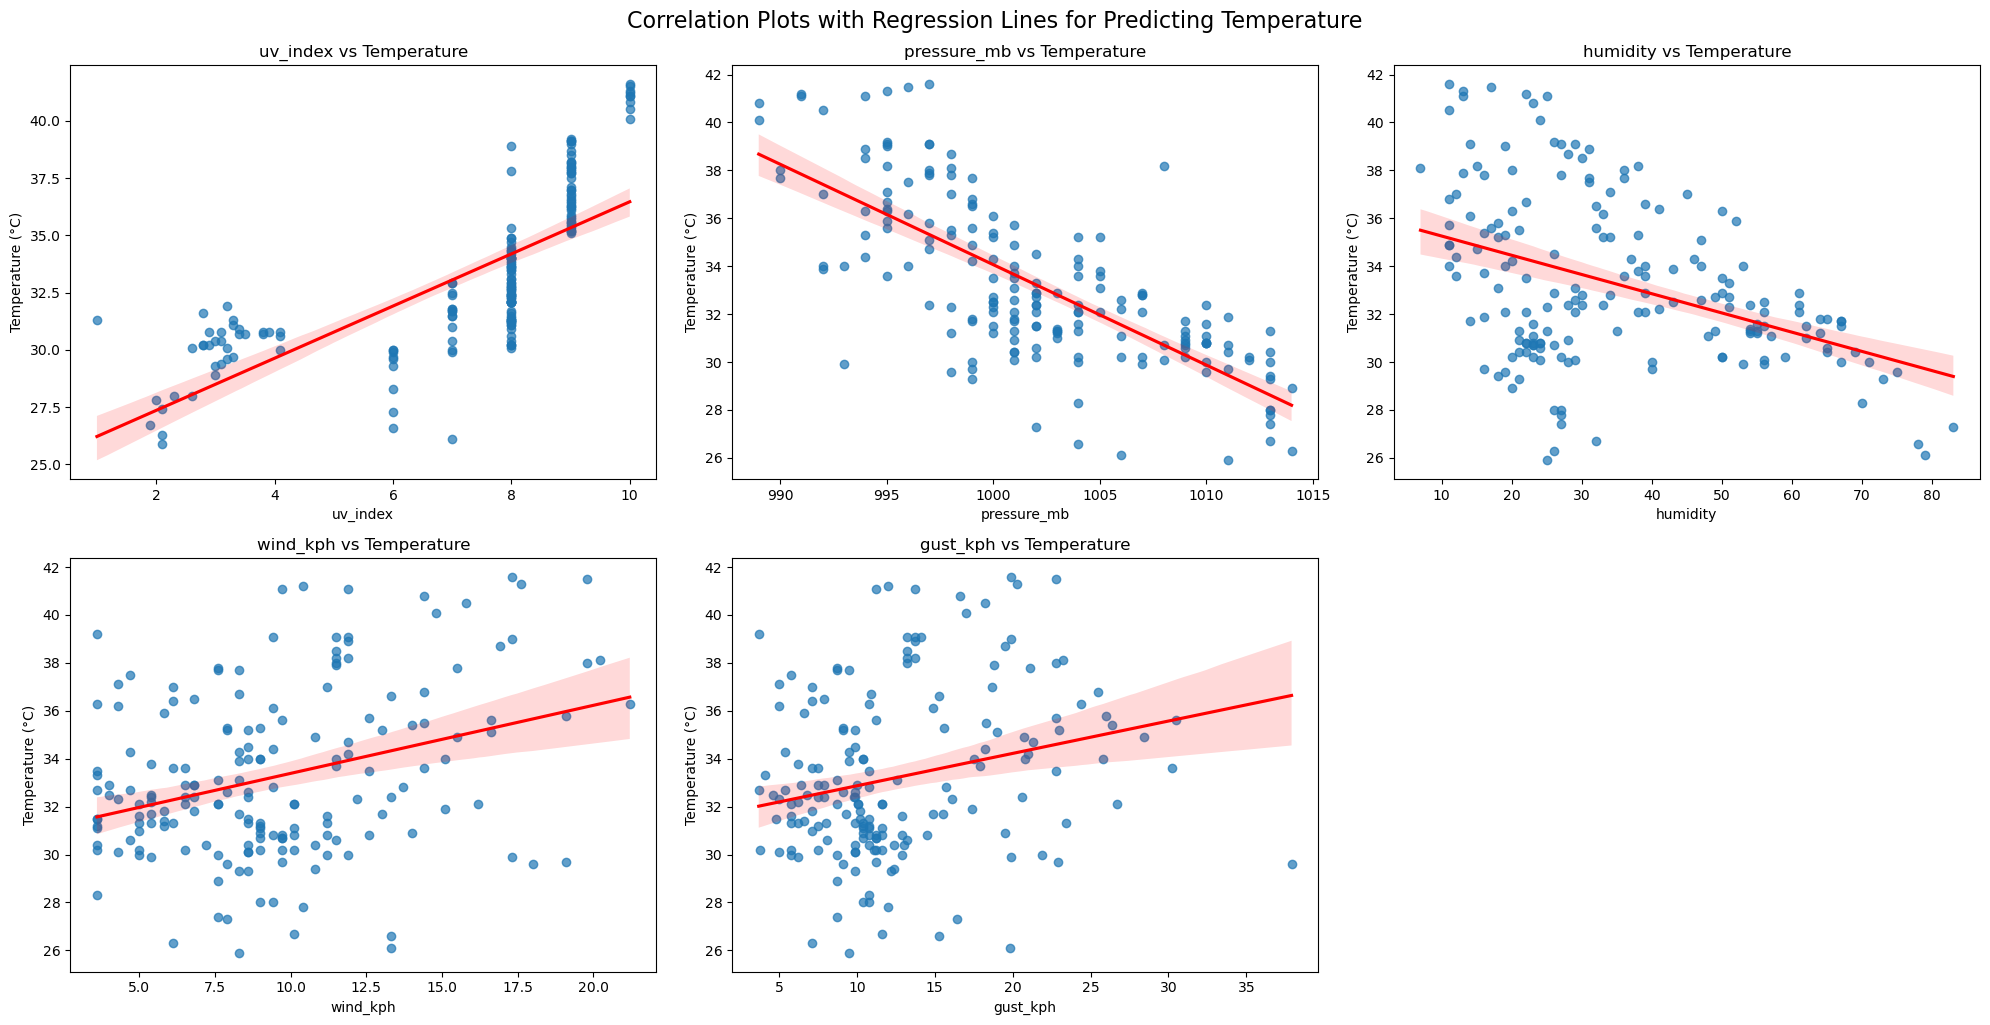

In [ ]:
# List of features to predict Temperature
predictor_columns = ['uv_index', 'pressure_mb', 'humidity', 'wind_kph', 'gust_kph']

# Set up the Figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

# Plot each predictor against 'temperature_celsius'
for i, column in enumerate(predictor_columns):
    sns.regplot(x=column, y='temperature_celsius', data=df_pak_copy, ax=axes[i],
                scatter_kws={'alpha':0.7}, line_kws={'color': 'red'})
    axes[i].set_title(f"{column} vs Temperature")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Temperature (°C)')

# Remove any unused subplots
for j in range(len(predictor_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.suptitle('Correlation Plots with Regression Lines for Predicting Temperature', y=1.02, fontsize=16)
plt.show()

Considering the highly positively correlated and negatively correlated features, we would train a multi linear regression model to predict temperature.

In [ ]:
# Machine learning libraries
from sklearn.model_selection import train_test_split

# Features for linear regressoin model training
predictor_columns = ['uv_index', 'pressure_mb', 'humidity', 'wind_kph', 'gust_kph']

# X: Predictor variables, y: Target variable
X = df_pak_copy[predictor_columns]
y = df_pak_copy['temperature_celsius']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data splited successfully for training and testing.")

Data splited successfully for training and testing.


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("Multi linear regression model has been trained successfully.")

Multi linear regression model has been trained successfully.


In [ ]:
# Analyizing the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate matrix
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 1.80
Mean Absolute Error (MAE): 1.07
R-squared (R²): 0.85


In [ ]:
# Get model coefficients
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': predictor_columns, 'Coefficient': coefficients})
print(feature_importance.sort_values(by='Coefficient', ascending=False))


       Feature  Coefficient
0     uv_index     0.676849
3     wind_kph     0.185157
2     humidity    -0.088531
4     gust_kph    -0.176318
1  pressure_mb    -0.262425


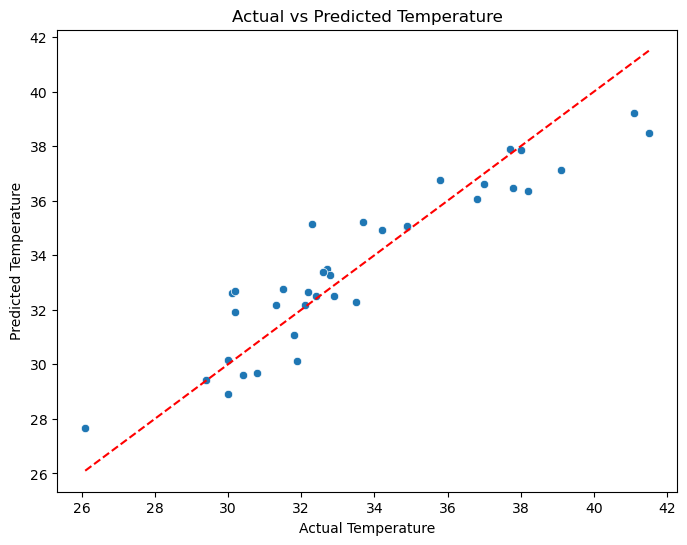

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

## Results
**Mean Squared Error (MSE)**  
The average squared difference between actual and predicted temperature for the above linear regression model is **1.80**, which indicates good accuracy.

**Mean Absolute Error (MAE)**  
The models predictions are less than **1.07** degree off.

**R-Squared $(R^2)$**  
This indicates that **85%** of the variance in the temperature is explained by the selected feature.

## Feature Coefficient Interpretation
**UV Index (uv_index)**  
UV Index is the strongest positive predictor. For every $1$ unit $(mW/m^2)$ increase in "un_index", the temperature increases by $0.67\degree C$.  

**Wind Speed (wind_kph)**  
Wind speed has slightly positive correlation with the temperature. For ever $1$ unit $(kph)$ increase in wind speed, the temperature increases by $0.18\degree C$. The data used in this study is taken for summer and early autumn. This shows that in summer winds usually bring warmer air to Islamabad.

**Humidity (humidity)**  
Increased humidity slightly reduces the predicted temperature. For every $1$ unit $(g/m^3)$ increase in humidity, the temperature decrease by $0.08 \degree C$.

**Gust (gust_kph)**  
Gust is the sudden increase in wind speed that lasts for a short period of time. An increase in $1$ unit $(kph)$ of gust, the temperature decreases by $0.17\degree C$. This shows that a sudden increase in wind speed brings cooler air into Islamabad.

**Atmospheric Pressure (pressure_mb)**  
Atomoshperic pressure has a negative correlation with the predicted temperature. For every $1$ unit $(Millibar)$ increase in Atmospheric Pressure, the temperature decreases by $0.26\degree C$.